### Usual imports

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

/work/uo1075/u241292/conda_envs/py37/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/work/uo1075/u241292/conda_envs/py37/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


### Load Psy

### https://psyplot.readthedocs.io/projects/psy-maps/en/latest/examples/example_circumpolar.html
    

In [2]:
import psyplot.project as psy
mpl.rcParams['figure.figsize'] = [10., 8.]

### Read File

In [4]:
file_hr='/home/zmaw/u241292/MPIOM/GR15L40_fx_area_60N.nc' # HR
file_lr='/home/zmaw/u241292/MPIOM/TP04L40_fx_area_60N.nc' # LR

### Plot with Psy

#### Globe

In [ ]:
maps = psy.plot.mapplot(file_lr, 
                        name='area', 
                        cmap='Blues',
                        maskleq=0,
                        stock_img=True,
                        lonlatbox=[-180, 180, 60, 90],
                        extend='max',
                        load=True,
                        projection='northpole',
                        xgrid=False, ygrid=False,
                        clabel='{desc}',title='LR',
                        bounds=np.arange(0,10000000000,1000000000),
                        datagrid=dict(color='k', linewidth=0.1),
                        tight=True)

In [6]:
maps.update(datagrid={'c': 'k', 'lw': 0.1},
            bounds=np.arange(0,10000000000,1000000000),
            projection='northpole',
            lonlatbox=[-180, 180, 60, 90],)
maps.show()


Exception in thread update_arr0:
Traceback (most recent call last):
  File "/work/uo1075/u241292/conda_envs/py37/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/work/uo1075/u241292/conda_envs/py37/lib/python3.7/threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "/work/uo1075/u241292/conda_envs/py37/lib/python3.7/site-packages/psyplot/data.py", line 4074, in worker
    draw=False, queues=queues)
  File "/work/uo1075/u241292/conda_envs/py37/lib/python3.7/site-packages/psyplot/data.py", line 2666, in start_update
    return InteractiveBase.start_update(self, draw=draw, queues=queues)
  File "/work/uo1075/u241292/conda_envs/py37/lib/python3.7/site-packages/psyplot/data.py", line 2264, in start_update
    return self.plotter.start_update(draw=draw, queues=queues)
  File "/work/uo1075/u241292/conda_envs/py37/lib/python3.7/site-packages/psyplot/plotter.py", line 1487, in start_update
    self.reinit(draw=draw)
  File "/work/

#### Arctic

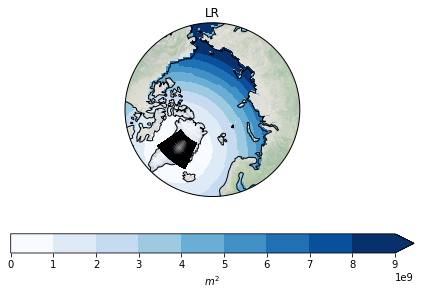

In [8]:
maps = psy.plot.mapplot(file_lr, 
                         name='area', 
                        cmap='Blues', stock_img=True,
                       lonlatbox=[-180, 180, 60, 90],
                        extend='max',
                       projection='northpole',
                       xgrid=False, ygrid=False,
                       clabel='$m^2$',title='LR',
                       bounds=np.arange(0,10000000000,1000000000),
                        datagrid={'c': 'k', 'lw': 0.1},
                       tight=True)

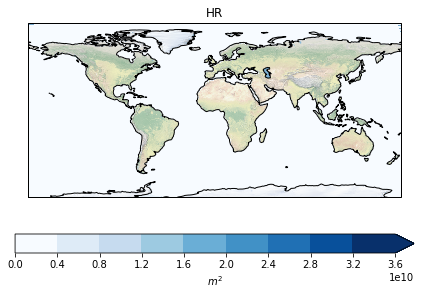

In [82]:
maps = psy.plot.mapplot(file_hr, name='area', cmap='Blues', stock_img=True,
#                        lonlatbox=[-180, 180, 60, 90],
                        extend='max',
#                        projection='northpole',
                       xgrid=False, ygrid=False,
                       clabel='$m^2$',title='HR',
                       bounds=np.arange(0,40000000000,4000000000),
                       tight=True)

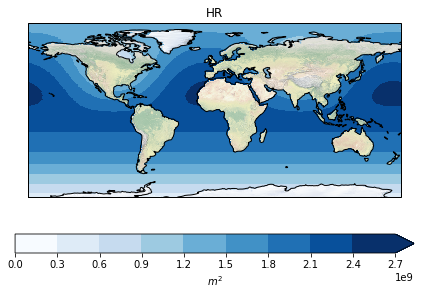

In [83]:
maps = psy.plot.mapplot(file_hr, name='area', cmap='Blues', stock_img=True,
#                        lonlatbox=[-180, 180, 60, 90],
                        extend='max',
#                        projection='northpole',
                       xgrid=False, ygrid=False,
                       clabel='$m^2$',title='HR',
                       bounds=np.arange(0,3000000000,300000000),
                       tight=True)

### Subplots

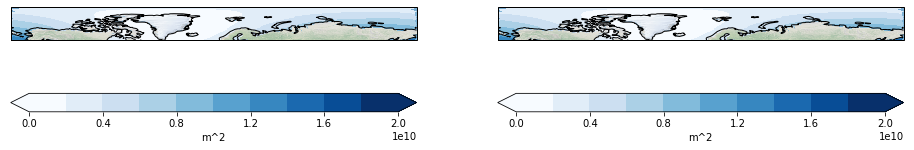

In [25]:
axes = psy.multiple_subplots(1, 2, n=2, for_maps=True)
psy.rcParams['auto_show'] = False

maps = psy.plot.mapplot(file_lr, name='area', cmap='Blues', stock_img=True,
                       lonlatbox=[-180, 180, 60, 90],extend='both',clabel='m^2',
                       projection='northpole',
                       xgrid=False, ygrid=False,
                       ax=axes[0])

maps = psy.plot.mapplot(file_lr, name='area', cmap='Blues', stock_img=True,
                       lonlatbox=[-180, 180, 60, 90],extend='both',clabel='m^2',
                       projection='northpole',
                       xgrid=False, ygrid=False,
                       ax=axes[1])

p = psy.gcp(True)
with p.no_auto_update:
#     p.update(projection='northpole', titlesize='x-large')
    p[1:].update(lonlatbox=[-180, 180, 60, 90])
    p.start_update()

In [20]:
psy.plot.mapplot.docs('plot')

plot
====
Choose how to visualize a 2-dimensional scalar data field

Possible types
--------------
None
    Don't make any plotting
'mesh'
    Use the :func:`matplotlib.pyplot.pcolormesh` function to make the plot
    or the :func:`matplotlib.pyplot.tripcolor` for an unstructered grid
'tri'
    Use the :func:`matplotlib.pyplot.tripcolor` function to plot data on a
    triangular grid
'contourf'
    Make a filled contour plot using the :func:`matplotlib.pyplot.contourf`
    function or the :func:`matplotlib.pyplot.tricontourf` for triangular
    data. The levels for the contour plot are controlled by the
    :attr:`levels` formatoption
'tricontourf'
    Make a filled contour plot using the
    :func:`matplotlib.pyplot.tricontourf` function



### Xarray vs. Psy open_dataset

In [7]:
print('Opened by xarray.open_dataset')
print(xr.open_dataset(file_lr)['area'])
print(' ')
print('Opened by psyplot.project.open_dataset')
print(psy.open_dataset(file_lr)['area'])

Opened by xarray.open_dataset
<xarray.DataArray 'area' (time: 1, depth: 1, y: 220, x: 256)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]]]], dtype=float32)
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * depth    (depth) float64 0.0
  * time     (time) object 0000-01-01 22:40:00
Dimensions without coordinates: y, x
Attributes:
    long_name:      Grid cell area
    standard_name:  grid_cell_area
    units:          m^2
    code:           87
 
Opened by psyplot.project.open_dataset
<xarray.DataArray 'area' (time: 1, depth: 1, y: 220, x: 256)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]]]], dtype=float32)
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * depth    (depth) float64 0.0
  * time     (time) object 0000-01-01 22:40:00
Dimensions without coordinates: y, x
Attributes:
    long_name:      Grid cell area
    standard_name:  grid_cell_area
    units:          m^2
    code:     

In [17]:
psy.plot.mapplot.keys(grouped=True)

**************************
Color coding formatoptions
**************************
+-------------+-------------+-------------+-------------+
| bounds      | cbar        | cbarspacing | cmap        |
+-------------+-------------+-------------+-------------+
| ctickprops  | cticksize   | ctickweight | extend      |
+-------------+-------------+-------------+-------------+
| levels      | miss_color  |             |             |
+-------------+-------------+-------------+-------------+

*******************
Label formatoptions
*******************
+----------------+----------------+----------------+----------------+
| clabel         | clabelprops    | clabelsize     | clabelweight   |
+----------------+----------------+----------------+----------------+
| figtitle       | figtitleprops  | figtitlesize   | figtitleweight |
+----------------+----------------+----------------+----------------+
| text           | title          | titleprops     | titlesize      |
+----------------+--------------